**Импорты**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

**Загрузка данных**

In [2]:
df = pd.read_csv('Wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Добавление заголовков**

In [3]:
df.columns = ['name'
	, 'alcohol'
	, 'malicAcid'
	, 'ash'
	, 'ashalcalinity'
	, 'magnesium'
	, 'totalPhenols'
	, 'flavanoids'
	, 'nonFlavanoidPhenols'
	, 'proanthocyanins'
	, 'colorIntensity'
	, 'hue'
	, 'od280_od315'
	, 'proline'
              ]

df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Проверка на пропущенные значения**

In [4]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

Вывод: пропущенных значений нет

**"Температурная" карта корреляций параметров**

<Axes: >

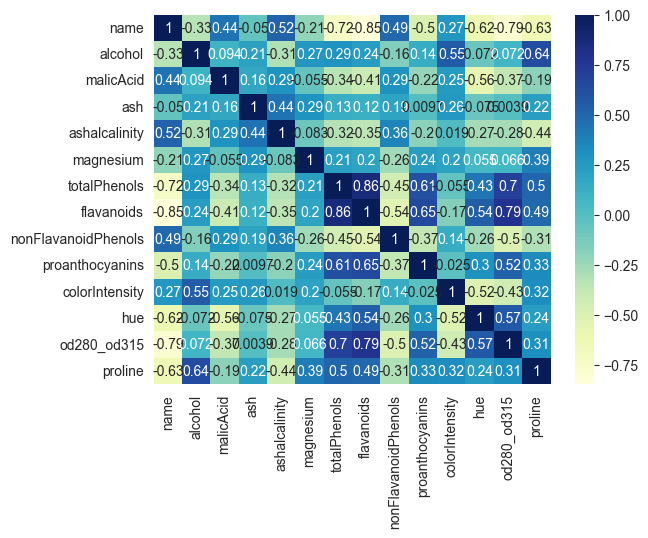

In [5]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

**Определение признаков**

In [6]:
X = df.drop(['name', 'ash'], axis=1)

X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Определение целевой переменной (название вина)**

In [7]:
Y = df['name'] - 1
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: name, dtype: int64

**Разделение данных на обучающую и тестовую выборки. Описание полученных множеств**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
Y_train.head()

(124, 12)
(54, 12)


22     0
108    1
175    2
145    2
71     1
Name: name, dtype: int64

**Разнообразные модели классификации**

In [9]:
models = [("Logistic Regression:", LogisticRegression()), ("Naive Bayes:", GaussianNB()),
          ("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)), ("Decision Tree:", DecisionTreeClassifier()),
          ("Support Vector Machine-linear:", SVC(kernel="linear")), ("Support Vector Machine-rbf:", SVC(kernel="rbf")),
          ("Random Forest:", RandomForestClassifier(n_estimators=7)), ("eXtreme Gradient Boost:", XGBClassifier()),
          ("MLP:", MLPClassifier(hidden_layer_sizes=(45, 30, 15), solver='sgd', learning_rate_init=0.01, max_iter=500)),
          ("AdaBoostClassifier:", AdaBoostClassifier()), ("GradientBoostingClassifier:", GradientBoostingClassifier())]

print('Models appended...')

Models appended...


**Работа моделей**

In [11]:
results = []
names = []
for name, model in models:
	k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
	cv_result = cross_val_score(model, X_train, Y_train.values.ravel(), cv=k_fold, scoring="accuracy")
	names.append(name)
	results.append(cv_result)

for i in range(len(names)):
	print(names[i], results[i].mean() * 100)

/Users/grindelf/Programming/my/python/wine-ml/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/grindelf/Programming/my/python/wine-ml/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Logistic Regression: 94.48717948717949
Naive Bayes: 96.85897435897436
K-Nearest Neighbour: 71.08974358974358
Decision Tree: 93.52564102564102
Support Vector Machine-linear: 95.96153846153845
Support Vector Machine-rbf: 62.948717948717956
Random Forest: 95.89743589743588
eXtreme Gradient Boost: 95.1923076923077
MLP: 30.57692307692308
AdaBoostClassifier: 89.42307692307693
GradientBoostingClassifier: 92.82051282051282


1. **Логистическая регрессия (Logistic Regression)**
   - Логистическая регрессия используется для решения задач бинарной классификации. Модель оценивает логарифм отношения вероятности принадлежности к одному из двух классов на основе линейной комбинации входных признаков.

2. **Наивный байесовский классификатор (Naive Bayes)**
   - Наивный байесовский классификатор основан на теореме Байеса и предполагает независимость между признаками. Он часто используется для задач классификации текста и имеет высокую точность при правильном предположении о независимости признаков.

3. **Метод k-ближайших соседей (K-Nearest Neighbour)**
   - K-Nearest Neighbour относит объект к классу, преобладающему среди k ближайших соседей в пространстве признаков. Результат может быть чувствителен к выбору параметра k.

4. **Дерево решений (Decision Tree)**
   - Дерево решений строит структуру в виде дерева, где каждый узел представляет признак, а каждое ребро - возможное значение этого признака. Позволяет принимать решения, основанные на серии вопросов о признаках.

5. **Метод опорных векторов - линейное ядро (Support Vector Machine-linear)**
   - SVM строит гиперплоскость, разделяющую классы в пространстве признаков. Линейное ядро подходит для линейно разделимых данных.

6. **Метод опорных векторов - радиальное ядро (Support Vector Machine-rbf)**
   - SVM с радиальным ядром подходит для данных, которые не линейно разделимы в исходном пространстве. Результат может быть чувствителен к параметрам ядра.

7. **Случайный лес (Random Forest)**
   - Случайный лес комбинирует несколько деревьев решений для улучшения обобщающей способности модели. Результат получается усреднением предсказаний отдельных деревьев.

8. **eXtreme Gradient Boost (XGBoost)**
   - XGBoost - это метод градиентного бустинга, который строит композицию деревьев решений. Он обучается последовательно, исправляя ошибки предыдущих моделей.

9. **Многослойный перцептрон (MLP)**
   - Многослойный перцептрон - это форма искусственной нейронной сети, состоящей из нескольких слоев нейронов. Обучается с использованием метода обратного распространения ошибки.

10. **AdaBoostClassifier**
    - AdaBoost - это метод адаптивного бустинга, который фокусируется на ошибках предыдущих моделей, присваивая им больший вес. Результат получается комбинированием взвешенных предсказаний.

11. **GradientBoostingClassifier**
    - Градиентный бустинг - это метод построения ансамбля деревьев решений, где каждое новое дерево направлено на улучшение ошибок предыдущего.